<a href="https://colab.research.google.com/github/Saksham050720/Data-science/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:

# reading csv files
data1 = pd.read_csv('/content/drive/MyDrive/business.csv')
data2 = pd.read_csv('/content/drive/MyDrive/economy.csv')


# New Section

In [ ]:
data1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [ ]:
data1['Class'] = 'Business'

In [ ]:
data1.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business


In [ ]:
data2['Class'] = 'Economy'

In [ ]:
data2

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",Economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",Economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",Economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",Economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",Economy
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy


In [ ]:
df1 = pd.concat([data1, data2])

In [ ]:
df1

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",Business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",Business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",Business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",Business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",Business
...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697",Economy
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709",Economy
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640",Economy


In [ ]:
df1['airline'].value_counts()

Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: airline, dtype: int64

In [ ]:

df1["price"]=df1["price"].str.replace(",","")
df1.tail(3)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Class
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,Economy
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,8640,Economy
206773,31-03-2022,Vistara,UK,824,20:30,Chennai,24h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,8640,Economy


In [ ]:
df1[["price"]] = df1[["price"]].apply(pd.to_numeric)

<function matplotlib.pyplot.show>

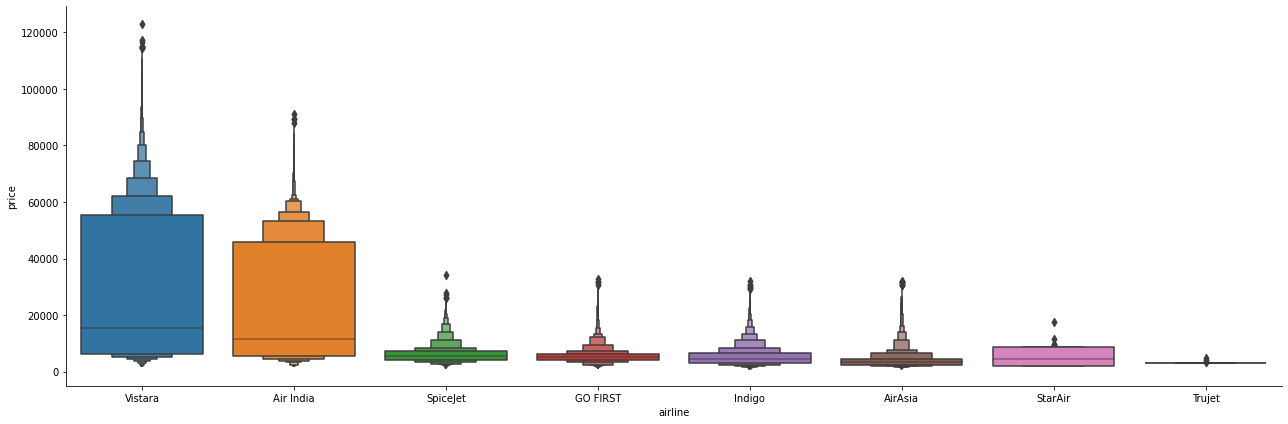

In [ ]:
sns.catplot(y='price',x='airline',data= df1.sort_values('price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [ ]:
df1['from'].value_counts()

Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: from, dtype: int64

<function matplotlib.pyplot.show>

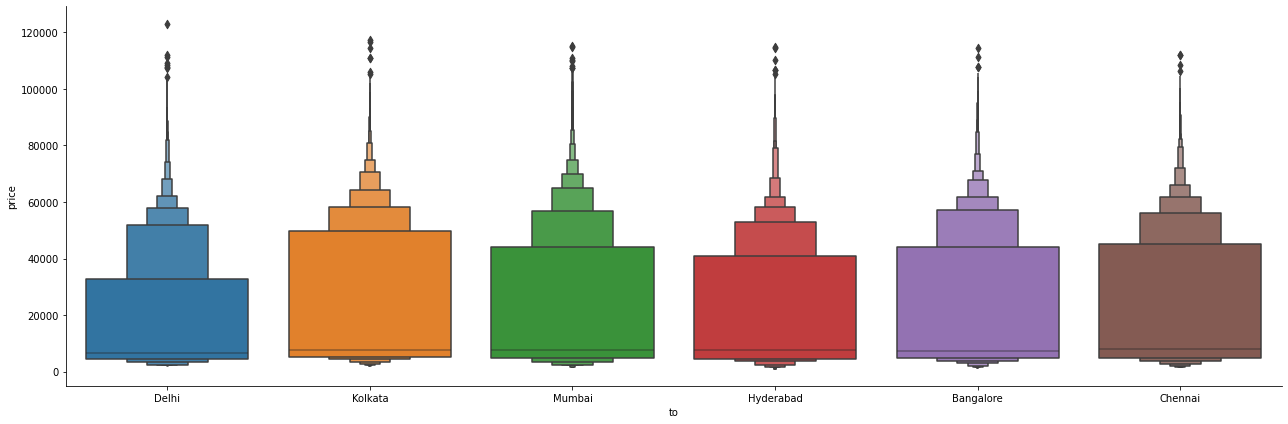

In [ ]:
sns.catplot(y='price',x='to',data= df1.sort_values('price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show

In [ ]:
df1['Date']=df1['date'].str.split('-').str[0]
df1['Month']=df1['date'].str.split('-').str[1]
df1['Year']=df1['date'].str.split('-').str[2]

In [ ]:
df1=df1.drop(['date'],axis=1)

In [ ]:
df1['Date']=df1['Date'].astype(int)
df1['Month']=df1['Month'].astype(int)
df1['Year']=df1['Year'].astype(int)

In [ ]:
df1['stop'].isnull().sum()

0

In [ ]:
df1['stop'].isna().sum()

0

In [ ]:
df1['stop'].str.strip()

0         non-stop
1         non-stop
2           1-stop
3           1-stop
4           1-stop
            ...   
206769      1-stop
206770      1-stop
206771      1-stop
206772      1-stop
206773      1-stop
Name: stop, Length: 300261, dtype: object

In [ ]:
df1['stop']=df1['stop'].replace('non-stop','0-stop')

In [ ]:
df1['Stop']=df1['stop'].str.split('-').str[0]

In [ ]:
df1=df1.drop(['stop'],axis=1)

In [ ]:
df1['time_taken']=df1['time_taken'].replace(':','.')


In [ ]:
df1=df1.drop(['num_code'],axis=1)
df1=df1.drop(['ch_code'],axis=1)

In [ ]:
df1['Arrival_hour']=df1['arr_time'].str.split(':').str[0]
df1['Arrival_minute']=df1['arr_time'].str.split(':').str[1]

df1['Departure_hour']=df1['dep_time'].str.split(':').str[0]
df1['Departure_minute']=df1['dep_time'].str.split(':').str[1]

df1.columns = df1.columns.str.replace(' ', '')


In [ ]:
df1=df1.drop(['dep_time'],axis=1)
df1=df1.drop(['arr_time'],axis=1)

In [ ]:
df1['Stop']=df1['Stop'].replace('non','0')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

Here we use LAbelEncoder 

In [ ]:
df1["airline"] = le.fit_transform(df1['airline'])
df1["from"] = le.fit_transform(df1['from'])
df1["to"] = le.fit_transform(df1['to'])
df1["Class"] = le.fit_transform(df1['Class'])

In [ ]:
df1=df1.drop(['Year'],axis=1)


Here we drop Year as we know that dataset is from Same Year that is 2022

In [ ]:
df1.dtypes

airline              int64
from                 int64
time_taken          object
to                   int64
price                int64
Class                int64
Date                 int64
Month                int64
Stop                object
Arrival_hour        object
Arrival_minute      object
Departure_hour      object
Departure_minute    object
dtype: object

In [ ]:
df1

,airline,from,time_taken,to,price,Class,Date,Month,Stop,Arrival_hour,Arrival_minute,Departure_hour,Departure_minute
0,0,2,02h 00m,5,25612,0,11,2,0,20,00,18,00
1,0,2,02h 15m,5,25612,0,11,2,0,21,15,19,00
2,0,2,24h 45m,5,42220,0,11,2,1,20,45,20,00
3,0,2,26h 30m,5,44450,0,11,2,1,23,55,21,25
4,0,2,06h 40m,5,46690,0,11,2,1,23,55,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7,1,13h 50m,3,7697,1,31,3,1,20,55,07,05
206770,7,1,13h 50m,3,7709,1,31,3,1,20,55,07,05
206771,7,1,20h 35m,3,8640,1,31,3,1,09,05,12,30
206772,7,1,23h 20m,3,8640,1,31,3,1,09,05,09,45


In [ ]:
df1['Stop']=df1['Stop'].str.split('+').str[0]


In [ ]:
df1

,airline,from,time_taken,to,price,Class,Date,Month,Stop,Arrival_hour,Arrival_minute,Departure_hour,Departure_minute
0,0,2,02h 00m,5,25612,0,11,2,0,20,00,18,00
1,0,2,02h 15m,5,25612,0,11,2,0,21,15,19,00
2,0,2,24h 45m,5,42220,0,11,2,1,20,45,20,00
3,0,2,26h 30m,5,44450,0,11,2,1,23,55,21,25
4,0,2,06h 40m,5,46690,0,11,2,1,23,55,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7,1,13h 50m,3,7697,1,31,3,1,20,55,07,05
206770,7,1,13h 50m,3,7709,1,31,3,1,20,55,07,05
206771,7,1,20h 35m,3,8640,1,31,3,1,09,05,12,30
206772,7,1,23h 20m,3,8640,1,31,3,1,09,05,09,45


In [ ]:
df1["time_taken"]=df1["time_taken"].str.replace("[hm]","")
df1["time_taken"]=df1["time_taken"].str.replace(" ",".")
df1.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,airline,from,time_taken,to,price,Class,Date,Month,Stop,Arrival_hour,Arrival_minute,Departure_hour,Departure_minute
0,0,2,02.00,5,25612,0,11,2,0,20,00,18,00
1,0,2,02.15,5,25612,0,11,2,0,21,15,19,00
2,0,2,24.45,5,42220,0,11,2,1,20,45,20,00


In [ ]:
#df1df1.iloc[189973]
#df1.iloc[189973]['time_taken'] = df1.iloc[189973]['time_taken'].rstrip('.')
#df1['time_taken'] = df1['time_taken'].str.replace(r'[^\w\s]+', '')
df1['time_taken'] = df1['time_taken'].str.rstrip('.!? \n\t')


In [ ]:
df1

,airline,from,time_taken,to,price,Class,Date,Month,Stop,Arrival_hour,Arrival_minute,Departure_hour,Departure_minute
0,0,2,02.00,5,25612,0,11,2,0,20,00,18,00
1,0,2,02.15,5,25612,0,11,2,0,21,15,19,00
2,0,2,24.45,5,42220,0,11,2,1,20,45,20,00
3,0,2,26.30,5,44450,0,11,2,1,23,55,21,25
4,0,2,06.40,5,46690,0,11,2,1,23,55,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7,1,13.50,3,7697,1,31,3,1,20,55,07,05
206770,7,1,13.50,3,7709,1,31,3,1,20,55,07,05
206771,7,1,20.35,3,8640,1,31,3,1,09,05,12,30
206772,7,1,23.20,3,8640,1,31,3,1,09,05,09,45


In [ ]:
df1[["Stop"]] = df1[["Stop"]].apply(pd.to_numeric)
df1[["Arrival_hour"]] = df1[["Arrival_hour"]].apply(pd.to_numeric)
df1[["Arrival_minute"]] = df1[["Arrival_minute"]].apply(pd.to_numeric)
df1[["Departure_hour"]] = df1[["Departure_hour"]].apply(pd.to_numeric)
df1[["Departure_minute"]] = df1[["Departure_minute"]].apply(pd.to_numeric)
df1[["time_taken"]] = df1[["time_taken"]].apply(pd.to_numeric)

In [ ]:
df1

,airline,from,time_taken,to,price,Class,Date,Month,Stop,Arrival_hour,Arrival_minute,Departure_hour,Departure_minute
0,0,2,2.00,5,25612,0,11,2,0,20,0,18,0
1,0,2,2.15,5,25612,0,11,2,0,21,15,19,0
2,0,2,24.45,5,42220,0,11,2,1,20,45,20,0
3,0,2,26.30,5,44450,0,11,2,1,23,55,21,25
4,0,2,6.40,5,46690,0,11,2,1,23,55,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,7,1,13.50,3,7697,1,31,3,1,20,55,7,5
206770,7,1,13.50,3,7709,1,31,3,1,20,55,7,5
206771,7,1,20.35,3,8640,1,31,3,1,9,5,12,30
206772,7,1,23.20,3,8640,1,31,3,1,9,5,9,45


In [ ]:
x = df1.drop(['price'],axis=1)
y= df1['price']

Separate data into Independent and Dependent Variable

In [ ]:
x.dtypes

airline               int64
from                  int64
time_taken          float64
to                    int64
Class                 int64
Date                  int64
Month                 int64
Stop                  int64
Arrival_hour          int64
Arrival_minute        int64
Departure_hour        int64
Departure_minute      int64
dtype: object

In [ ]:
y.head()

0    25612
1    25612
2    42220
3    44450
4    46690
Name: price, dtype: int64

In [ ]:

df1.dtypes

airline               int64
from                  int64
time_taken          float64
to                    int64
price                 int64
Class                 int64
Date                  int64
Month                 int64
Stop                  int64
Arrival_hour          int64
Arrival_minute        int64
Departure_hour        int64
Departure_minute      int64
dtype: object

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [ ]:
X_train.dtypes

airline               int64
from                  int64
time_taken          float64
to                    int64
Class                 int64
Date                  int64
Month                 int64
Stop                  int64
Arrival_hour          int64
Arrival_minute        int64
Departure_hour        int64
Departure_minute      int64
dtype: object

In [ ]:
df1.dtypes

airline               int64
from                  int64
time_taken          float64
to                    int64
price                 int64
Class                 int64
Date                  int64
Month                 int64
Stop                  int64
Arrival_hour          int64
Arrival_minute        int64
Departure_hour        int64
Departure_minute      int64
dtype: object

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.9073703305342162